In [2]:
# Hausi's email: hausimuller@gmail.com
# Quantum Composer: quantum.cloud.ibm.com/composer

# notebook imports
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
import os

# load environment variables from .env file
from dotenv import load_dotenv
load_dotenv()

# load Qiskit API token from .env file
QISKIT_API_TOKEN = os.getenv("QISKIT_API_TOKEN")
QiskitRuntimeService.save_account(token=QISKIT_API_TOKEN, overwrite=True)

# import qutip; for modelling quantum systems
import qutip

The goal of this Term Portfolio Project (TPP) is to document your learning journey into the realm of Quantum Computing by developing a Jupyter Notebook Portfolio.

First and foremost, this document is for you to reflect regularly on your learning journey. Secondly, it is intended for your instructors and teaching assistants to gauge your progress in understanding the topics being discussed in this course.

The Portfolio Term Project should be developed incrementally &mdash; with weekly contributions. The TPP consists of two parts. The first part should be approximately 5-7 pages (i.e., printing Jupyter Notebook as PDF pages).  The second part must include the first part at the beginning of the document -- that is, simply extend the Part 1 Jupyter Notebook to develop the second part. Thus, the final Jupyter Notebook that includes both parts should be approximately 18-20 pages.

For Part 1, you are to document the following aspects of your Quantum computing journey, and also your experience learning the functionality and use of Jupyter Notebooks. Here are some questions you can answer for Part 1 of your TPP.


1. How did you get up to speed in basic linear algebra (e.g., Euler formula, complex plane,  linear transformations or operators, eigenvectors and eigenvalues), including which resources you consulted in this process?

> As I am early(ish) into my degree program, I took linear algebra not too long ago (2 years prior to this course). I also took PHYS223 two semesters ago, which served as a good introduction to the physics (and maths) behind QIS, and further solidified my linear algebra skills. For these reasons it took less time to get back "up to speed". 

> The resources I consulted consisted of the PHYS223 textbook @zygelmanFirstIntroductionQuantum2025, and the videos recommended by Dr. Muller.

> Additionally, the [Xanadu Quantum Codebook](https://pennylane.ai/codebook) helped significantly. 

2. How did you get started in documenting linear algebra formulas (e.g., Euler formula or matrices) using LaTeX Markdown in Jupyter Notebooks?  Develop your own cheat sheet of the quantum computing formulas and Dirac notation to ease assignment typesetting.

> I actually used Jupyter Notebooks for PHYS223 as well, so I was quite familiar with common $\LaTeX{}$ notation used in QIS. 

### Commonly used notation: 

`\bra{[some symbol]}`: Pretty self-explanatory. creates a Bra.  

`\ket{[some symbol]}`: As above. Creates a ket. 

`\begin{bmatrix} a & b \\ c & d \end{bmatrix}`: Creates a 2x2 matrix with elements a,b,c,d. This can be adapted to any size for states or operators. 

3. How did you get started running your first quantum circuits using IBM Qiskit and Xanadu Pennylane Jupyter Notebook platforms?

> I prefer IBM Qiskit (as I have previous experience there) and used it's tools extensively to model and simulate circuits. If you have a LaTeX installation, you can make Qiskit output a beautiful circuit in LaTeX format and even have it match standard notation by flipping the order of the qubits: 

```python
# obviously one should define circuit earlier by using a Qiskit.QuantumCircuit object first. 

circuit.draw(output="latex", reverse_bits="True")

```

4. How would you motivate other students to join the journey into quantum computing given the motivational materials presented in class and found in the references? Your answers to this question will likely evolve during this course. Revisit regularly this quesion.

The answer to this question definitely depends on the student one is talking to-- Quantum Computing has many applications (and therefore reasons for study). 

As a SENG major, I found the applications of Shor's Algorithm to be most interesting- as cybersecurity and cryptography are elements of my degree program that I found to be extremely interesting. 

A theoretical CSC major may find Grover's Algorithm most interesting, observing the $O(\log{n})$ to $O(\sqrt{n})$ time complexity speedup for search most interesting. 

Science majors may find other applications areas more useful, like molecular modeling, or VQEs for math/physics fields. 

Furthermore the foundational sciences behind quantum computation might prove to be the most motivating factor, especially for students interested in photonics or dealing with particles near absolute zero. 


5. Which algorithm is your favourite quantum algorithm so far?
In my studies I found Shor's algorithm to be my favourite so far- Dr. De Sousa's explanation in my previous studies really showed the elegance of the algorithm, and being able to test out the algorithm on real software proved to be really cool. 

6. What was the most challenging part in understanding Grover's algorithm?
7. (Required) What are your personal insights, aha moments, and epiphanies you experienced in the first part of this course?

> Jan 20: I realize that I need to review Clifford Gates in a more in-depth manner. It seems I haven't looked at those enough. 

8. (Required) How did you experience Generative AI as a learning tool for this course?
Record your Generative AI prompts and contexts for Basic Quantum Terms, Complex Linear Algebra, Quantum Algorithms, Python, Qiskit, and PennyLane inquiries for easy recall. Use the same line item or project in your genAI engine (e.g., ChatGPT, Google Gemini, Perplexity, or others) to build up the "quantum context".

Citations and references. The contents of your notebook portfolio project must be your own work. If you reference the work of others (including information found on the web or using genAI tools), include full citations in a bibliography at the end of your document.

# Week 2 (Lecture 3-4)
Introduction to 1-qubit systems.

Recall Euler's Identity: 

$$
e^{i\pi{}} + 1 = 0
$$

Which in the general case is Euler's Formula: 

$$
e^{i\theta} = \cos{\theta} + i \sin{\theta}
$$

## Classical vs. Quantum Computing

Quantum computing is a completely different model of quantum computing. 

A key difference is that qubits can be in *superposition*- that is, data can exist on a spectrum anywhere from $\ket{0}$ to $\ket{1}$. 

It is based on linear algebra, rather than boolean algebra in the classical realm. States may be ambiguous, due to entanglement and importantly, interference. 

> Inteference can be mitigated by running a circuit many times, and sampling (to identify error).

Processing is done in parallel (rather than sequentially in classical space), using probabilistic quantum gates (rather than deterministic gates). 


## Basic Gates

$\ket{\phi}$ Gate: Initializes qubit to a given state, described by $\phi$.
> Note that this gate is not physically realizable on real quantum hardware, but is useful for simulation.



Hadamard (H) Gate: Puts a qubit into superposition. Note the definition of Hadamard at [IBM Quantum Learning](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.HGate)

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

*Note:* The Hadamard gate is a LINEAR operator. Therefore we can take advantage of the properties of linearity, which is especially useful when dealing with states in superposition. 

CNOT: Depending on the value of the control-bit, this will perform a NOT operation (Pauli-X matrix) on the target qubit. 

Measurement: Collapses the qubit and measures it, and outputs to a classical bit. 


## Matrix Notation
Dirac notation is a way of doing "short-hand" for large vectors. This simplifies working with matrices. 

## Bra-Ket Notation
[Bra-Ket notation](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation) is the standard way of communicating Quantum Information. 

### Computational Basis
In quantum mechanics, $\ket{0}$ and $\ket{1}$ are the fundamental, orthogonal states of a qubit, analogous to $0$ and $1$ of a classical bit. 

They form the building blocks for any more complex quantum state. 

$$
\ket{0} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad
\ket{1} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

## So what is a Bra and a Ket? 
A "Ket" $\ket{\psi}$ is a column vector, representing a quantum state. A "Bra" $\bra{\psi}$ is the conjugate transpose of a Ket, represented as a row vector.

The Ket captures all information about a quantum state, while the Bra is used in operations like inner products and outer products.

### Conjugate Transpose
The conjugate transpose (or Hermitian transpose, notated by $\dagger$) of a matrix is obtained by taking the transpose of the matrix and then taking the complex conjugate of each element &mdash; that is, changing the sign of the imaginary part.

> To do this, replace every complex number in the vector with it's complex conjugate (i.e., change the sign of the imaginary part), then transpose the vector (i.e., convert rows to columns and vice versa).

$$
\text{If } \ket{\psi} = \begin{bmatrix} a +
ib \\ c + id \end{bmatrix}, \text{ then } \bra{\psi} = \begin{bmatrix} a - ib & c - id \end{bmatrix}
$$

Alternatively, using conjugate-star notation:

## Inner Product
The inner product (or dot product) of two quantum states $\ket{\phi}$ and $\ket{\psi}$ is denoted as $\langle \phi | \psi \rangle$.

It is calculated like a dot product, and results in a scalar. 

> These products are often referred to as expectation values. 

### Applications
The inner product can be interpreted in many ways in Quantum Mechanics: 

- Quantum Overlap: Measures the similarilty (or overlap)

(review slide 24, L03)

## Outer Product
The reverse order produces a matrix (often used as an operator): 

$$
\bra{\phi}\ket{\psi} = \begin{bmatrix} \phi{}_1 \\ \phi{}_2 \end{bmatrix} \begin{bmatrix} \psi{}_1^{*} & \psi{}_2 \end{bmatrix}

$$

### Applications

(Review L03, slide 25)

## Superposition

Unlike classical bits, a qubit can exist in a superposition of $\ket{0}$ and $\ket{1}$, simultaneously. This is a probablilistic combination of all possible states until measured. (Think a linear combination of states.)

$$

\ket{\psi} = \alpha{} \ket{0} + \beta{}\ket{1} \qquad{} \alpha{}, \beta{} \in{} \mathbb{C}

$$

Note that $\alpha{}$ and $\beta{}$ are **complex amplitudes**, and are NOT probabilities. 

Superposition is the physical interpretation of a linear combination. 

- The qubit is not in state $\ket{0}$ or in state $\ket{1}$. 
- It instead exists in a **coherent combination** of both basis states. 
- Interference between amplitudes is possible (this enables many quantum algorithms to amplify correct answers)

> Superposition enables quantum parallelism and interference, but is not inherently randomness. 

## Born Rule
The Born rule connects the quantum state to measurement outcomes: 

$$ 
P(0) = |\alpha|^2, \qquad P(1) = |\beta|^2
$$

- Measurement collapses the state to a basis state
- Probabilites come from squared magnitudes.
- It is important to ensure probabilites sum to 1. 

We often want $ |\alpha|^2 + |\beta|^2 = 1$.

Alternatively, 

$$ 
|\alpha|^2 + |\beta|^2 = \alpha \alpha^* + \beta \beta^* = 1
$$

Note how * denotes the complex conjugate of each value. 

> This is why superpositions often have square-rooted magnitudes. 







/opt/homebrew/anaconda3/envs/qiskit-jupyter/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:272: UserWarning: Style JSON file 'default.json' not found in any of these locations: /opt/homebrew/anaconda3/envs/qiskit-jupyter/lib/python3.11/site-packages/qiskit/visualization/circuit/styles/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(


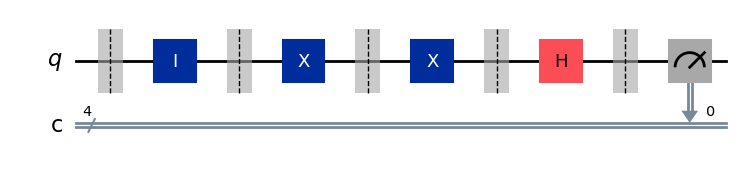

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.barrier(qreg_q[0])
circuit.id(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

circuit.draw(output='mpl', style='default')

Let's talk about gates, and what they do. 

## Identity matrix (I-Gate)
This applies the identity matrix to the state, appling the operation $I\ket{\psi}$ for some arbitrary state. 

## NOT Gate (Pauli-X Gate)
This applies the Pauli-X matrix to the state, inverting it's state. 

$$ 

X = \begin{bmatrix} 0 & 1 \\1 & 0 \end{bmatrix}

$$ 

## H Gate (Hadamard Gate)
This applies the Hadamard Matrix to the state as a unitary operator. The Hadamard Matrix is defined as: 
$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$
This puts a single qubit into an entangled state in the computational basis. 

Recall: 

$$
\ket{0} \xrightarrow{H} \ket{+} \\
\ket{1} \xrightarrow{H} \ket{-} \\
$$


## Key Definitions

- Gate Time Definition: Time required to apply a single quantum gate operation

- Optimization Balance: Balance operational speed against error rates and decoherence. 

- Decoherence Risk: Like any physical system, the QPU wants to return to it's state of least entropy. This is fundamentally bad for quantum computers, as it means the data we have stored will become unintelligible- as we have lost our information. (Usually a quantized energy level has entered an undefined energy level, or some other physical phenomena in other implementations of quantum systems)

This means we can lose our information stored in the system. This is further exacerbated by the introduction of additional quantum gates in our system, as they inherently introduce additional quantum noise into our states. 



# Unitary Operations

Unitary operations are incredibly important to quantum computing. Each operator is reversible.


For any unitary matrix $U$: 

$$ 
UU^{\dagger} = I
$$

- We observe the conservation of probability (that is the total probability remains exactly 1),
- We observe that all unitary operations (hence all quantum operations) can be undone. 

To check if a matrix is unitary, verify that matrix multiplicaiton with it's complex conjugate yields the identity matrix. 

In short, Unitary Matrices **preserve probabilites** and are **reversible**. 

> Note that matrices are linear operators. Therefore all properties of linearity apply. 

## Why are matrices called operators? 
Matrices act on vectors to produce new vectors - acting exactly like functions that transform inputs to outputs. 

We can apply these operations sequentially, as defined already in matrix arithmetic. 

Using matrices as operators unlocks eigenvalue analysis, diagonalization and spectral theory - tools for solving complex problems. 



 # Week 3 (Lecture 5/6)
 This week we have our first quiz on the basics of Quantum Computation (Jan. 20). Review Bra-Ket, matrix mult, complex analysis, basic gates (hadamard, pauli, etc.) and transformations on the computational basis. 

 This week we should be jumping into quantum computation a bit further, and maybe see our first algorithm (likely Shor) soon. 

 ## Lecture 5
 In this lecture we will begin introducing multi-qubit modelling, and introduce the tensor product. We might get into Hilbert spaces in the lecture too. 

 
Four important states on the Bloch sphere: 


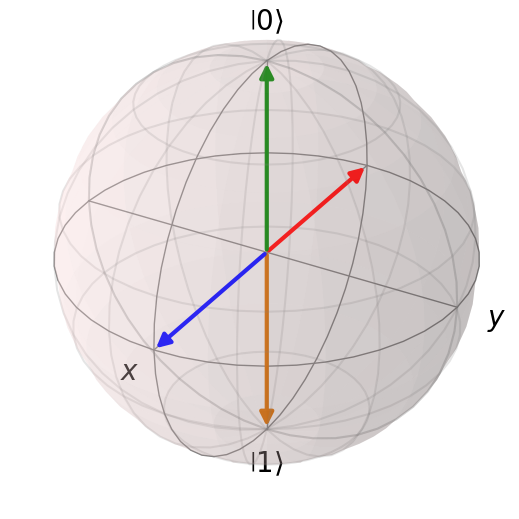

In [5]:
ket_zero = qutip.basis(2, 0)  # ground state |0>, green arrow
ket_one = qutip.basis(2, 1)  # excited state |1> , orange arrow
ket_plus = qutip.basis(2, 0).unit() + qutip.basis(2, 1).unit()  # normalized superposition state (|0> + |1>)/sqrt(2) \equiv |+>, blue arrow
ket_minus = qutip.basis(2, 0).unit() - qutip.basis(2, 1).unit()  # normalized superposition state (|0> - |1>)/sqrt(2) \equiv |->, red arrow

bloch = qutip.Bloch()  # visualize the Bloch sphere
bloch.add_states([ket_zero, ket_one, ket_plus.unit(), ket_minus.unit()])
bloch.show()

## Key States
The Bloch sphere above has two computational bases mapped upon it. They are: 
### Computational Basis: $\ket{0}$ (Green Arrow), $\ket{1}$ (Orange Arrow)
This is the *Z-basis*. 


### Hadamard Basis: $\ket{+}$ (Blue Arrow), $\ket{-}$ (Red Arrow)
This is the *X-basis*. 

# Y-basis

$$ 
\ket{+Y} = \frac{1}{\sqrt{2}} \left(\ket{0} + i\ket{1}    \right)
$$


$$ 
\ket{-Y} = \frac{1}{\sqrt{2}} \left(\ket{0} - i\ket{1}    \right)
$$

## Matrices
 Again, matrices are linear operators, where $M_{n,m}(\mathbb{C})$ is the set of all $n \times m$ complex matrices. 

 Some matrices serve as quantum (logic) gates. 

 > Quantum gates are $ n \times n$ complex matrices, and are *Euclidean Norm Preserving*. 

 > Q: What does *Euclidean Norm Preserving* mean? A: Review this [article](https://en.wikipedia.org/wiki/Norm_(mathematics)).

 > A (after review): The Euclidean Norm, on the complex plane is just the *modulus* of the number. That is, the distance between two vectors remains unchanged after transformation via the unitary. See this [article](https://en.wikipedia.org/wiki/Isometry) for further details on the requirement for isometry. 

 If $U$ is unitary, then: 

 - $U^\dagger{} = U^{-1}$

 > See slide 27 for more. 

 ### Operations

 - Complex conjugate $A^*$: 
 $$ (A^*)_{ij} = (A_{ij})^* $$

 - Transpose $A^T$: 
 $$ (A^T)_{ij} = A_{ji} $$


 > review L05 slides 23 and 24 for further operations. 

 ### Properties

In general Commutative property does not hold! $A \cdot{} B \neq{} B \cdot{} A$

- Associativity: $ (AB)C = A(BC) = ABC $
- Distributive Property: $ A(B+C) = AB + AC$
- Distributive Property: $ (A+B)C = AC + BC $
- Commutativity of scalars: $ \lambda{} A(B) = A(\lambda{} B)$, where $\lambda \in \mathbb{C}$. 


## Adjoint or Inverse Operations

Some quantum gates can cancel themselves when applied twice in a row. Some examples include the pauli gates, and the H gate.

A key mathematical term for these gates is that they satisfy the [Involutory Property](https://en.wikipedia.org/wiki/Involutory_matrix). 

> Verify this later by manually computing the matrix represenations, where $ U \cdot U = I$, where each $U$ represents some pauli matrix, or a hadamard matrix. 

## Hermitian Operators
> Will be covered next class (L06). 

> The below extract comes from [Wikipedia](https://en.wikipedia.org/wiki/Hermitian_adjoint): 

Hermitian Operators, (also called Hermitian Adjoint) are special linear operators that satisfy the following properties: 
1. Involutivity: $A^{**} = A$
2. If $A$ is invertible, then so is $A^{*}$, with $(A^{*})^{-1} = (A^{-1})^*$. 
3. Conjugate Linearity applies: 
    a. $(A+B)^{*} = A^* + B^*$
    b. $(\lambda{} A)^{*} = \bar{\lambda}A^{*}$, where the bar represents the complex conjugate of $\lambda$. 
4. "Anti-distributivity": $(AB)^* = B^{*}A^{*}$

It's also important to note that Hermitian Operators only have real eigenvalues-- and have a complete set of orthonormal eigenvectors. (Keep this in mind, because we can use this property to quickly disprove whether a given linear operator is hermitian.)

## Pauli Matrices
Each of the pauli gates $X$, $Y$, and $Z$ correspond with a rotation over it's corresponding axis on the Bloch sphere. 

We can use these to generate arbitrary rotation operators $R_{n \in \{X,Y,Z,\phi{}\}}(\theta)$, where $\phi{}$ corresponds to ANY arbitrary axis in the Bloch sphere.

> PHYS223 A3 should contain some review problems on this topic. 

# Arbitrary Rotations

The below equation shows that, for any arbitrary normalized axis $\hat{n}$, we can perform a rotation around it, by generating a unitary operator, denoted $R_{\hat{n}}(\theta{})$. Note that $\vec{\sigma_{n}}$ denotes the vector definition for the axis $\hat{n}$: 

> The below excerpt is adapted from my previous coursework for PHYS223: 

**a)** The identity is resolved as follows: 

$$ 
\begin{align}
R_{\hat{n}}(\theta{}) &= e^{-i \frac{\theta{}}{2}\hat{n}\cdot{}\vec{\sigma{}}}                                             \tag{Given by (1)} \\
&\equiv{} \sum{}_{k = 0}^{\infty{}} \left(\frac{\left(i \frac{\theta}{2} \vec{\sigma_{n}}   \right)^{k}}{k!}    \right)      \tag{via the Maclaurin series expansion of $e^x$.} \\
&\equiv{} \sum{}_{k = 0}^{\infty{}} \left(\frac{\left(i \frac{\theta}{2} \vec{\sigma_{n}}   \right)^{(2k)}}{(2k)!}    \right) + \sum{}_{k = 0}^{\infty{}} \left(\frac{\left(i \frac{\theta}{2} \vec{\sigma_{n}}   \right)^{(2k+1)}}{(2k + 1)!}    \right)                                                  \tag{splitting into even and odd sums.} \\




\end{align}
$$

As $\vec{\sigma{}_n}$ is a unit vector, we know that $\vec{\sigma{}_n}^2 = 1$ (This is because any unit vector can be formed as a linear combination of $\sigma_x, \sigma_y, \sigma_z$). (We also use the properties of $i$ to simplify further.) Therefore, we can simplify the Maclaurin series: 

$$
\begin{align}
&\equiv{} \sum{}_{k = 0}^{\infty{}} \left(\frac{\left((-1)^{k} \left(\frac{\theta}{2}\right)^{2k}    \right)}{(2k)!} \cdot I    \right) + \sum{}_{k = 0}^{\infty{}} \left(\frac{\left(-i (-1)^k \left(\frac{\theta}{2}\right)^{2k + 1}    \right)}{(2k + 1)!} \cdot{} \vec{\sigma_{n}}    \right)  \\
&\equiv{} \cos{\frac{\theta{}}{2}} \cdot{} I - i \sin{\frac{\theta}{2}} \cdot \vec{\sigma_n} \qquad{} \tag{By expressing the Maclaurin series in closed form.}
\end{align}

$$
**b)** To prove that $R_{\hat{n}}(\theta{})$ is unitary, we must show that $R_{\hat{n}}(\theta{})^{\dagger} = R_{\hat{n}}(\theta{})^{-1}$, which implies that $R_{\hat{n}}(\theta{})^{\dagger} \cdot R_{\hat{n}}(\theta{}) = I$.

Hence, we must resolve the identity:

First, we have that $R_{\hat{n}}(\theta{})^{\dagger} = \left(\cos{\frac{\theta{}}{2}} \cdot{} I - i \sin{\frac{\theta}{2}} \cdot \vec{\sigma_n} \right)^{\dagger} = \cos{\frac{\theta{}}{2}} \cdot{} I + i \sin{\frac{\theta}{2}} \cdot \vec{\sigma_n}$.

This holds as both the identity and the Pauli matrices are Hermitian.

Next, we have that $R_{\hat{n}}(\theta{})^{\dagger} \cdot R_{\hat{n}}(\theta{}) = \left(\cos{\frac{\theta{}}{2}} \cdot{} I + i \sin{\frac{\theta}{2}} \cdot \vec{\sigma_n} \right) \cdot \left(\cos{\frac{\theta{}}{2}} \cdot{} I - i \sin{\frac{\theta}{2}} \cdot \vec{\sigma_n} \right) = \cos^{2}{\frac{\theta{}}{2}} \cdot{} I + \sin^{2}{\frac{\theta}{2}} \cdot{} I = I$.

As we have just resolved the identity, we have shown that $R_{\hat{n}}(\theta{})$ is unitary.

Next, we can show that $R_{\hat{n}}(\theta{})^\dagger = R_{\hat{n}}(-\theta{})$.

This may be achieved by subbing in $-\theta$ into the expression for $R_{\hat{n}}(\theta{})$. 

$$
\begin{align}
R_{\hat{n}}(-\theta{}) &= \cos{\frac{-\theta{}}{2}} \cdot{} I - i \sin{\frac{-\theta}{2}} \cdot \vec{\sigma_n} \\
&= \cos{\frac{\theta{}}{2}} \cdot{} I + i \sin{\frac{\theta}{2}} \cdot \vec{\sigma_n} \\
&= R_{\hat{n}}(\theta{})^{\dagger}
\end{align}
$$




# 2-qubit systems
These systems consist of 2 qubits instead of just one. 
$$
\ket{\psi} = \ket{\phi{}_1} \otimes \ket{\phi{}_2} = \ket{\phi{}_1 \phi{}_2}
$$

This allows us to use controlled (mutli-qubit) gates, like CNOT. 

As an example: 

$$
\ket{\psi{}_1} = \alpha{}\beta{}\ket{10} = \alpha{}\ket{1} \otimes \beta{}\ket{0} = \alpha{}\begin{bmatrix} 0 \\ 1 \end{bmatrix} \otimes \beta{}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \alpha{}\beta{}\begin{bmatrix} 0 \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} \\ 1 \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} \end{bmatrix} = \alpha{}\beta{}\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0\end{bmatrix}
$$


Therefore we can observe that Dirac notation is a short-hand format for tensor-product form, where a bitstring within a dirac state is equal to each individual bit being tensor-multiplied with each surrounding bit in order. 

$$
\ket{abc} = \ket{c} \otimes \ket{b} \otimes \ket{c} \otimes
$$

## CNOT (among other multi-qubit gates)

Multi-qubit gates are larger than $2 \times 2$ matrices. This is because they operate on vectors of a higher dimensionality, and therefore must be larger to accomodate this. Given $n$ qubits to operate on, they will be of size $2^n \times 2^n$. 

In general, if we are repeating the same gate $n$ times, we can use the notation: 
$$ U^{\otimes n} = U \otimes U \otimes U \otimes \dots  \otimes U $$

> Review PHYS 223 notes for reference on designing custom multi-qubit gates. 

# Lecture 6

## Interference
Amplitudes can interfere constructively or deconstructively, because they are complex numbers. 

Constructive: Amplitudes with the same phase add together and increase the probability.
Deconstructive: Amplitudes with opposing phases subtract and reduce the probability. 

(This kind of works like the summation of sinusoidal functions)

## Entanglement

Qubits that should appear independent often influence other (entangled) qubits when they are affected. This means we shouldn't consider independent probabilities, but instead calculate **probability distributions**.

> Changing the direction of one qubit changes all the dependent probabilities. 



# Lecture 7

> [Assignment 1](https://app.crowdmark.com/student/courses/spring-2026-csc-557-seng-457-a01-a02-x) is posted: it is due Feb. 9. 

Helpful Definition: $U$ Gate, which can be defined as: $U \ket{\phi} = YH\ket{\phi}$. These gates perform the following operation: 

$$ 
U(\theta, \phi, \lambda) = P(\phi) R_Y(\theta) P(\lambda) 
        = e^{i\frac{\phi + \lambda}{2}} R_Z(\phi) R_Y(\theta) R_Z(\lambda).
$$

This gate operates as a generic rotation function on one qubit. 

## Creating a Simple Quantum Circuit (Qiskit)

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


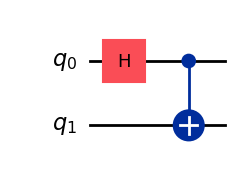

In [8]:
# Python function to create a simple circuit with one qubit
from qiskit import QuantumCircuit

def create_bell_circuit() -> QuantumCircuit:
    # initialize a quantum circuit with 2 qubits
    qc = QuantumCircuit(2)
    # apply a Hadamard gate on the first qubit
    qc.h(0)

    # apply a CNOT gate with the first qubit as control and the second as target
    qc.cx(0, 1)
    return qc

def print_circuit(qc: QuantumCircuit) -> None:
    print(qc)

bell_circuit = create_bell_circuit()
print_circuit(bell_circuit)

# alternatively, use LaTeX or mpl: 
bell_circuit.draw(output='mpl', style='default')

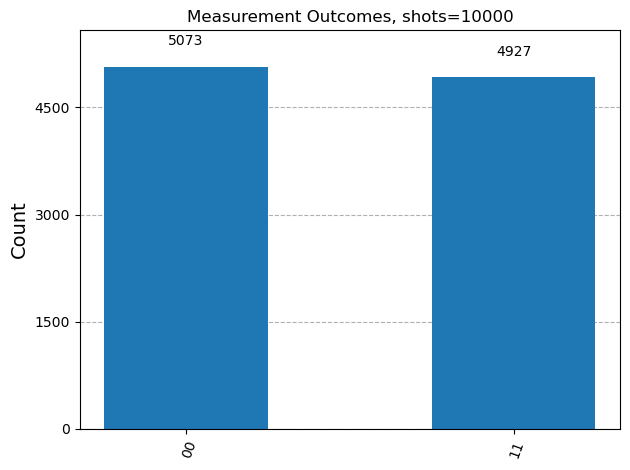

{'11': 4927, '00': 5073}


In [ ]:
# Now, we will execute the circuit on a simulator backend
from unittest import result
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from IPython.display import display
from traitlets import Any

N_QUBITS: int = 2
N_SHOTS: int = 10000
SIMULATOR: str = 'aer_sim' \
'ulator'

def print_state_vector(qc: QuantumCircuit, msg: str) -> None:
    state = Statevector.from_instruction(qc)
    print(f"{msg}: {state}")

def create_bell_circuit() -> QuantumCircuit:
    qc = QuantumCircuit(N_QUBITS)
    qc.barrier()
    # print_state_vector(qc, "Barrier 1")
    
    # apply a Hadamard gate on the first qubit
    qc.h(0)
    # print_state_vector(qc, "Barrier 2")

    # apply a CNOT gate with the first qubit as control and the second as target
    qc.cx(0, 1)
    # print_state_vector(qc, "Barrier 3")
    return qc

def execute_circuit(qc: QuantumCircuit) -> Any | None: # This should return a Counts object from qiskit.result.counts.Counts
    # add measurement to the circuit
    qc.measure_all()

    # transpile the circuit for the simulator backend
    simulator = Aer.get_backend(SIMULATOR)
    compiled_circuit = transpile(qc, simulator)

    # execute the circuit on the simulator backend
    job = simulator.run(compiled_circuit, shots=N_SHOTS)

    # get the results from the job
    result = job.result()

    # get the counts (measurement outcomes)
    counts = result.get_counts(compiled_circuit)

    # plot the histogram of results
    display(plot_histogram(counts, title="Measurement Outcomes, shots="+str(N_SHOTS)))

    return counts

bell_circuit = create_bell_circuit()
counts = execute_circuit(bell_circuit)
print(counts)




## General Midterm Questions

Given the variables ($\alpha$, $\beta$, $\gamma$, $\delta$) assume the variables are normalized coefficients- if not, throw an error.

Given the state $\ket{\phi}$: 

$$ 
\ket{\phi} = \alpha \ket{00} + \beta \ket{01} + \gamma \ket{10} + \delta \ket{11}
$$

Write a `qiskit` program to generate a circuit $U$ that yields the state $\phi$ after applying $U$. That is, $U \ket{00} = \ket{\phi}$. 

> Strategies: use the general rotation gate $U$ gate to compose a larger gate that applies the appropriate rotations in the Q-Sphere. 

We can use the properties of the [Schmidt Decomposition](https://en.wikipedia.org/wiki/Schmidt_decomposition) to do this:

Generated Circuit:


/opt/homebrew/anaconda3/envs/qiskit-jupyter/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:272: UserWarning: Style JSON file 'default.json' not found in any of these locations: /opt/homebrew/anaconda3/envs/qiskit-jupyter/lib/python3.11/site-packages/qiskit/visualization/circuit/styles/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(


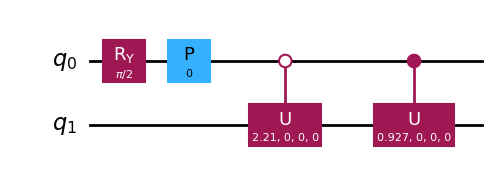


Resulting State Vector:


<IPython.core.display.Math object>


Estimated Output Probabilities:
|00>: 0.0999 = 9.99%
|01>: 0.3994 = 39.94%
|10>: 0.3994 = 39.94%
|11>: 0.0999 = 9.99%


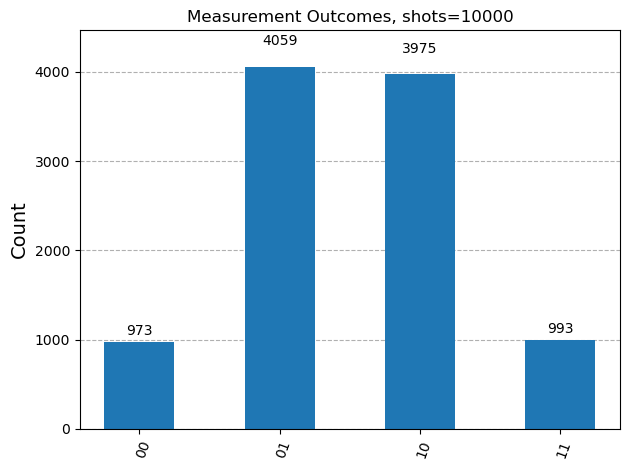


Measurement Counts:
{'01': 4059, '11': 993, '00': 973, '10': 3975}


In [67]:
from fractions import Fraction
import numpy as np
import cmath
from qiskit import QuantumCircuit
from qiskit.circuit.library import UGate
from IPython.display import Math, display

def generate_arbitrary_state(alpha, beta, gamma, delta):
    """
    Generates a circuit U such that U|00> = a|00> + b|01> + c|10> + d|11>
    using manual rotation decomposition.
    """
    
    # 1. VALIDATION & NORMALIZATION
    coeffs = np.array([alpha, beta, gamma, delta], dtype=complex)
    norm = np.linalg.norm(coeffs)
    
    if not np.isclose(norm, 1.0):
        # Normalize the coefficients
        coeffs = coeffs / norm
        alpha, beta, gamma, delta = coeffs

        
    # 2. CALCULATE PROBABILITIES FOR Q0
    # Group coefficients by the state of Q0
    # Branch 0 (Q0=0): coefficients alpha, beta
    p0 = np.abs(alpha)**2 + np.abs(beta)**2
    
    # Branch 1 (Q0=1): coefficients gamma, delta
    p1 = np.abs(gamma)**2 + np.abs(delta)**2
    
    # Calculate Theta for Q0 Rotation (Ry)
    # Ry(theta) |0> = cos(theta/2)|0> + sin(theta/2)|1>
    # We want cos(theta/2) = sqrt(p0)
    theta_root = 2 * np.arccos(np.sqrt(p0))
    
    # 3. HELPER: CONVERT VECTOR TO U-GATE ANGLES
    # We need a function to turn a target vector [c0, c1] into U(theta, phi, lambda)
    def get_u_params(c0, c1):
        # Normalize local branch
        local_norm = np.sqrt(np.abs(c0)**2 + np.abs(c1)**2)
        if local_norm == 0: 
            return 0, 0, 0, 0 # Dead branch
            
        c0 = c0 / local_norm
        c1 = c1 / local_norm
        
        # Convert to Polar
        r0, phase0 = cmath.polar(c0)
        r1, phase1 = cmath.polar(c1)
        
        # U(theta, phi, lambda) * |0> = cos(theta/2)|0> + e^i(phi)*sin(theta/2)|1>
        # The U gate creates a real coefficient for |0>.
        # We must track the 'global phase' of this branch (phase0) to apply later.
        
        theta = 2 * np.arccos(r0)
        phi = phase1 - phase0
        lam = 0 # Doesn't affect output when starting from |0>
        
        return theta, phi, lam, phase0

    # Calculate parameters for the two branches
    theta0, phi0, lam0, phase_branch0 = get_u_params(alpha, beta)
    theta1, phi1, lam1, phase_branch1 = get_u_params(gamma, delta)

    # 4. CONSTRUCT THE CIRCUIT
    qc = QuantumCircuit(2)
    
    # A. Root Rotation on Q0
    qc.ry(theta_root, 0)
    
    # B. Phase Correction on Q0
    # We need to fix the relative phase between the |0...> branch and |1...> branch
    # The U-gates we are about to apply assume the first coeff is real, 
    # but 'alpha' and 'gamma' might have phases.
    relative_phase = phase_branch1 - phase_branch0
    qc.p(relative_phase, 0) # Apply phase difference to Q1 branch (controlled by Q0=1)
    
    # Optional: If we cared about Global Phase, we would apply phase_branch0 globally.
    
    # C. Multiplexed Rotations on Q1
    # We apply U_0 if Q0 is 0, and U_1 if Q0 is 1.
    
    # Branch 0: Control-0 (Open Control)
    u_gate0 = UGate(theta0, phi0, lam0)
    # Using 'ctrl_state=0' makes it activate when control qubit is 0
    c_u0 = u_gate0.control(1, ctrl_state=0) 
    qc.append(c_u0, [0, 1])
    
    # Branch 1: Control-1 (Standard Control)
    u_gate1 = UGate(theta1, phi1, lam1)
    c_u1 = u_gate1.control(1, ctrl_state=1)
    qc.append(c_u1, [0, 1])
    
    return qc


# Define un-normalized inputs to test (will be normalized manually for input)
# inputs can be complex numbers. 
# Example: Bell State |00> + |11>
# a=1, b=0, c=0, d=1 -> normalized: 1/sqrt(2)
v = [1, 2, 2, 1]
norm_v = np.linalg.norm(v)
params = [x/norm_v for x in v]

try:
    qc = generate_arbitrary_state(*params)
    print("Generated Circuit:")
    display(qc.draw(output='mpl', style='default'))
    
    # Verify statevector BEFORE adding measurements
    from qiskit.quantum_info import Statevector
    final_state = Statevector(qc)
    print("\nResulting State Vector:")
    state_vector = final_state.data.round(3)
    def format_complex(c):
        real = Fraction(c.real).limit_denominator(1000)
        imag = Fraction(c.imag).limit_denominator(1000)
        
        if np.isclose(imag, 0):
            return f"\\frac{{{real.numerator}}}{{{real.denominator}}}"
        else:
            imag_sign = "+" if imag >= 0 else "-"
            return f"\\frac{{{real.numerator}}}{{{real.denominator}}}{imag_sign}\\frac{{{abs(imag.numerator)}}}{{{abs(imag.denominator)}}}i"
    
    latex_str = r"|\phi\rangle = " + " + ".join([f"{format_complex(c)} |{i:02b}\\rangle" for i, c in enumerate(state_vector) if not np.isclose(c, 0)])
    display(Math(latex_str))

    # output probabilities
    print("\nEstimated Output Probabilities:")
    for i, amplitude in enumerate(state_vector):
        probability = np.abs(amplitude)**2
        if not np.isclose(probability, 0):
            print(f"|{i:02b}>: {probability:.4f} = {probability * 100:.2f}%")
    

    # Make a copy for simulation to avoid adding measurements twice
    qc_copy = qc.copy()
    counts = execute_circuit(qc_copy)
    print("\nMeasurement Counts:")
    print(counts)

    
except Exception as e:
    print(e)

# Bibliography

[1] B. Zygelman, A First Introduction to Quantum Computing and Information. in Undergraduate Topics in Computer Science. Cham: Springer International Publishing, 2025. doi: 10.1007/978-3-031-66425-0.
